In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [5]:
raw,raw_meta = utils.read_ST_data("../../raw/MouseWT_raw.csv")
raw,_ = utils.data_norm(raw, "logCPM")
imp,imp_meta = utils.read_ST_data("../imputed/MouseWT_cpm_imputed.csv")
imp = np.log2(imp + 1)

In [2]:
def plot_scatter(a, b, genea, geneb):
    """ Method to plot gene gene correlation with PCC and SCC scores
    
    Parameters:
    ----------
    a: gene expression of gene a
    b: gene expression of gene b
    genea: name of gene a
    geneb: name of gene b
    
    """
    f = plt.figure(figsize=(4,4))
    plt.scatter(a,b)
    pcc = pearsonr(a, b)[0]
    scc = spearmanr(a, b)[0]
    plt.title("PCC=%.2f, SCC=%.2f" %(pcc, scc),
                  fontsize=14, color="red")
    plt.xlabel(genea, fontsize=14)
    plt.ylabel(geneb, fontsize=14)
    plt.tick_params(labelsize=12)
    plt.close()
    return f

In [9]:
### Figure 5c
#https://mouse.brain-map.org/gene/show/18184 (Cldn11 - RP_070116_01_G04 - coronal)
Cldn11 = [2.25,2.,2.34,2.52,2.83,3.3,3.4,3.07,3.5,3.54,3.45,2.56]
#https://mouse.brain-map.org/gene/show/87786 (Arhgef10 - RP_070116_01_B05 - coronal)
Arhgef10 = [0.2,0,0.44,0.28,0.64,0.91,1.14,0.73,1.36,1.3,1.4,0.53]
f = plot_scatter(Cldn11, Arhgef10,"Cldn11", "Arhgef10")
f.savefig('Fig5c.png', dpi=300, bbox_inches= 'tight')

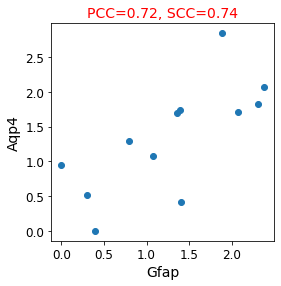

In [4]:
### Figure 5f
## Values for genes are from Allen Brain Atlas Mouse regional gene expression data
#https://mouse.brain-map.org/gene/show/14356 (Gfap - RP_Baylor_253913 - coronal)
Gfap = [0.3,1.36, 2.07,0,0.4,1.4,1.07,0.79,1.39,2.38,2.31,1.89]
#https://mouse.brain-map.org/gene/show/11616 (Aqp4 - RP_040324_01_F07 - coronal)
Aqp4 = [0.52,1.7,1.71,0.94,0,0.41,1.08,1.29,1.74,2.07,1.82,2.84]
plot_scatter(Gfap, Aqp4, 'Gfap', 'Aqp4')